<a href="https://colab.research.google.com/github/AnkurGuglani/spark-foundation/blob/main/TASK_6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 3-Prediction using Decision Tree  Algorithm

## BY : ANKUR GUGLANI
## ROLL NO:MA20M001
## EMAIL: ma20m001@smail.iitm.ac.in

### WHAT WE WANT TO DO: 
###    *Create the Decision Tree classifier and visualize it graphically.
###    *The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing the important libraries and packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
Uploading the file

SyntaxError: ignored

In [17]:
iris = pd.read_csv("Iris_decision.csv")
print("file is uploaded")

file is uploaded


In [19]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
iris.drop(["Id"],axis = 1,inplace = True)

In [23]:
iris.shape

(150, 5)

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking Outliers 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


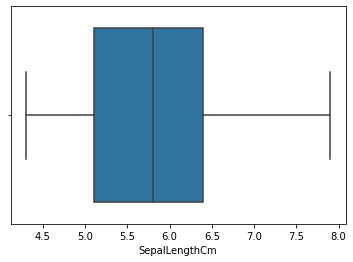

In [27]:
sns.boxplot(iris["SepalLengthCm"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


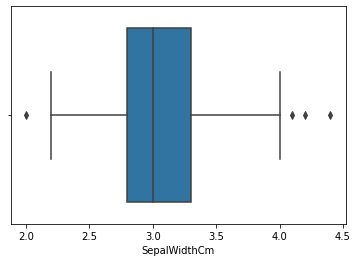

In [28]:
sns.boxplot(iris["SepalWidthCm"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


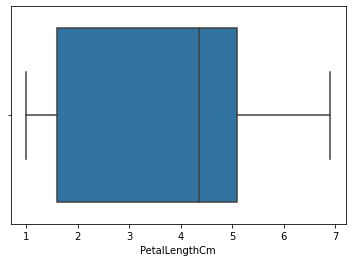

In [29]:
sns.boxplot(iris["PetalLengthCm"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


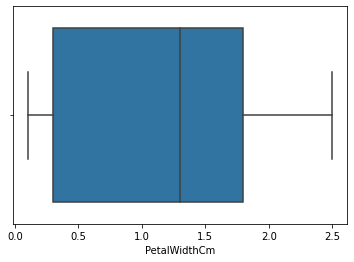

In [30]:
sns.boxplot(iris["PetalWidthCm"])

In [31]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
iris = iris[~((iris < (Q1-1.5 * IQR)) |(iris > (Q3 + 1.5 * IQR))).any(axis=1)]
iris.shape

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


(146, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


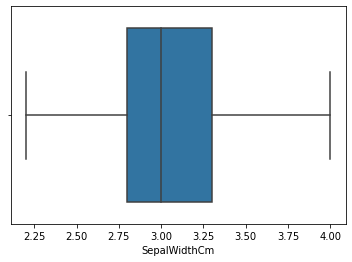

In [32]:
sns.boxplot(iris["SepalWidthCm"])

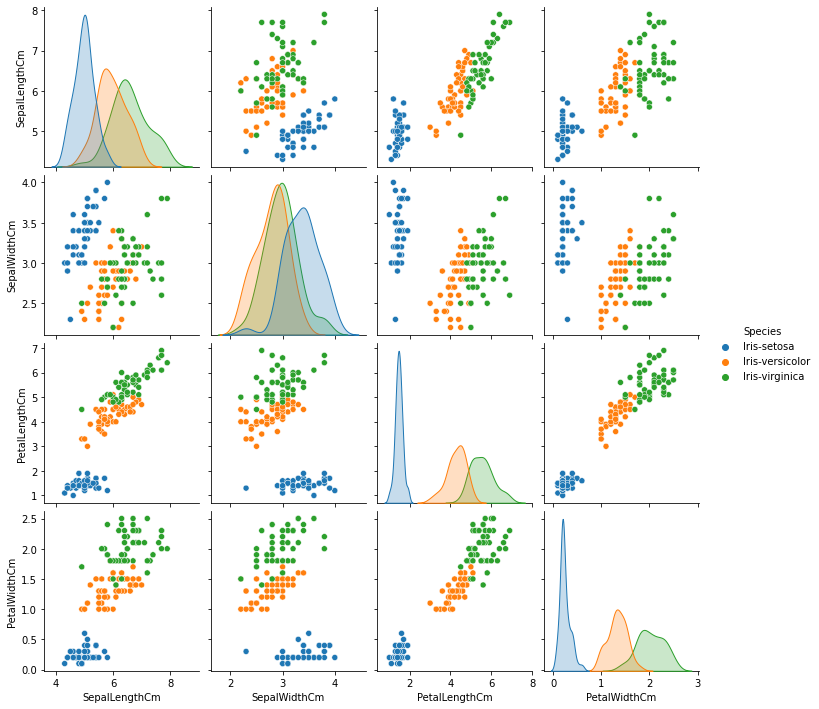

In [34]:
sns.pairplot(iris, hue = "Species")

In [35]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000


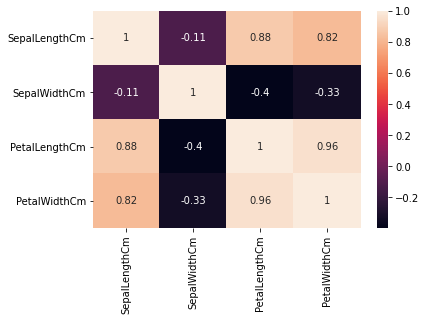

In [36]:
sns.heatmap(iris.corr(),annot = True)

In [37]:
x = iris.drop("Species",axis = 1)

In [38]:
y = iris.Species

In [ ]:
x.shape,y.shape

((146, 4), (146,))

## Training the data


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 5)

In [40]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((109, 4), (109,), (37, 4), (37,))

In [41]:
dtree = DecisionTreeClassifier(criterion = "entropy",random_state =50)

In [42]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

## Visualize the graph

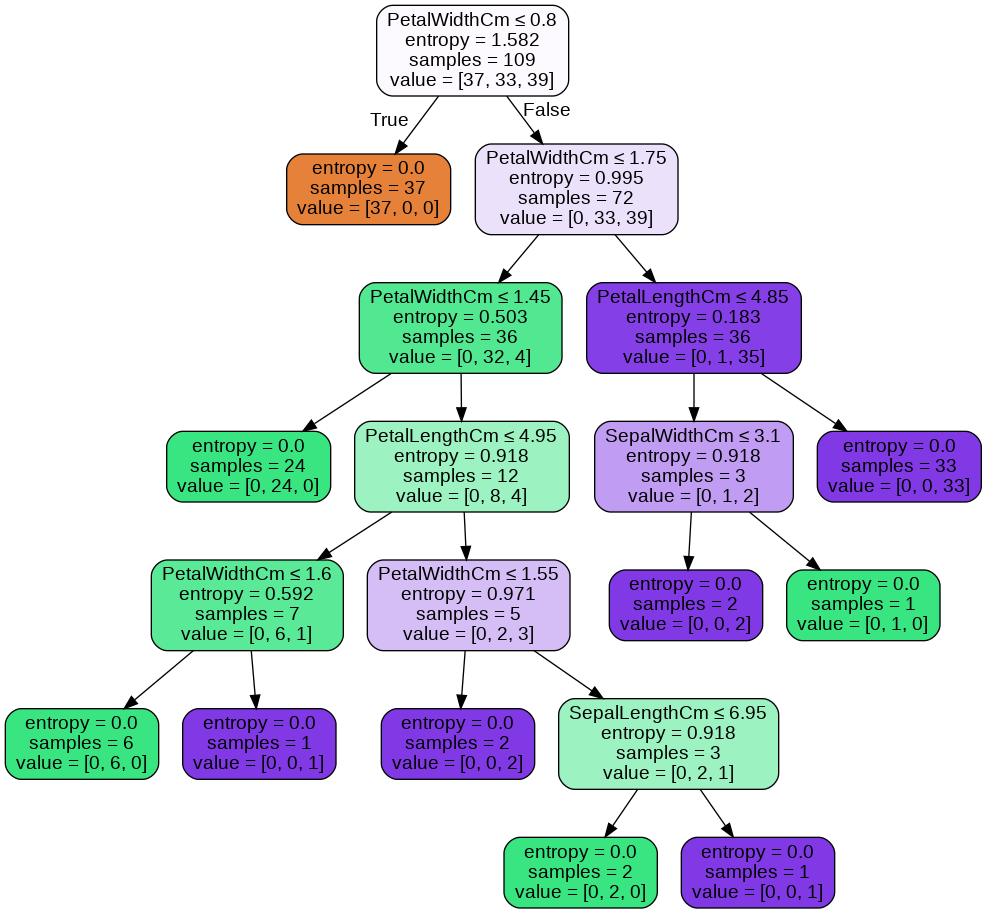

In [43]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [44]:
pred_train = dtree.predict(x_train)
pred_test = dtree.predict(x_test)

In [45]:
pred_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [46]:
confusion_matrix(y_test,pred_test)

array([[10,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 10]])

In [47]:
print("train Accuracy",accuracy_score(y_train,pred_train))
print("test Accuracy",accuracy_score(y_test,pred_test))

train Accuracy 1.0
test Accuracy 0.972972972972973


### The model is a generalized model and its 97.297% accurate